In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
os.chdir('C:\\Users\\VICTUS\\Downloads')

In [3]:
data_frame_01 = pd.read_excel('IMDb Movies India.xls')

In [4]:
data_frame_02 = data_frame_01.copy()

In [5]:
data_frame_02.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data_frame_02

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_frame_02.dropna(subset='Year',inplace=True)

In [8]:
data_frame_02.dropna(subset='Genre',inplace=True)

In [9]:
data_frame_02.dropna(subset='Director',inplace=True)

In [10]:
data_frame_02.dropna(subset='Actor 1',inplace=True)

In [11]:
data_frame_02.dropna(subset='Actor 2',inplace=True)

In [12]:
data_frame_02.dropna(subset='Actor 3',inplace=True)

In [13]:
data_frame_02

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
data_frame_02.isnull().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating      3528
Votes       3527
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [15]:
data_frame_02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11086 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11086 non-null  object 
 1   Year      11086 non-null  object 
 2   Duration  6445 non-null   object 
 3   Genre     11086 non-null  object 
 4   Rating    7558 non-null   float64
 5   Votes     7559 non-null   object 
 6   Director  11086 non-null  object 
 7   Actor 1   11086 non-null  object 
 8   Actor 2   11086 non-null  object 
 9   Actor 3   11086 non-null  object 
dtypes: float64(1), object(9)
memory usage: 952.7+ KB


In [16]:
median_rating = data_frame_02['Rating'].median()


In [17]:
data_frame_02['Rating'].fillna(median_rating, inplace=True)


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8852\1978638798.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame_02['Rating'].fillna(median_rating, inplace=True)


In [18]:
data_frame_02

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,(1979),NaN,Action,6.0,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [19]:
data_frame_02.at[6908, 'Votes'] = np.nan


In [20]:
data_frame_02.drop_duplicates(inplace=True)

In [21]:
dup_data=data_frame_02.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


In [22]:
data_frame_02.describe()

,Rating
count,11085.000000
mean,5.871222
std,1.133199
min,1.100000
25%,5.400000
50%,6.000000
75%,6.400000
max,10.000000


In [23]:
data_frame_02.isnull().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating         0
Votes       3526
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [24]:
data_frame_02.drop('Year',axis=1,inplace=True)

In [25]:
data_frame_02.drop('Votes',axis=1,inplace=True)

In [26]:
data_frame_02.drop('Director',axis=1,inplace=True)

In [27]:
data_frame_02.drop('Actor 1',axis=1,inplace=True)

In [28]:
data_frame_02.drop('Actor 2',axis=1,inplace=True)

In [29]:
data_frame_02.drop('Actor 3',axis=1,inplace=True)

In [30]:
data_frame_02


,Name,Duration,Genre,Rating
1,#Gadhvi (He thought he was Gandhi),109 min,Drama,7.0
2,#Homecoming,90 min,"Drama, Musical",6.0
3,#Yaaram,110 min,"Comedy, Romance",4.4
4,...And Once Again,105 min,Drama,6.0
5,...Aur Pyaar Ho Gaya,147 min,"Comedy, Drama, Musical",4.7
...,...,...,...,...
15502,Zulm Ki Pukar,NaN,Action,6.0
15503,Zulm Ki Zanjeer,125 min,"Action, Crime, Drama",5.8
15504,Zulm Ko Jala Doonga,NaN,Action,4.6
15505,Zulmi,129 min,"Action, Drama",4.5


In [31]:
data_frame_02.dropna(subset=['Duration'], inplace=True)


In [32]:
data_frame_02

,Name,Duration,Genre,Rating
1,#Gadhvi (He thought he was Gandhi),109 min,Drama,7.0
2,#Homecoming,90 min,"Drama, Musical",6.0
3,#Yaaram,110 min,"Comedy, Romance",4.4
4,...And Once Again,105 min,Drama,6.0
5,...Aur Pyaar Ho Gaya,147 min,"Comedy, Drama, Musical",4.7
...,...,...,...,...
15493,Zubaan,115 min,Drama,6.1
15494,Zubeidaa,153 min,"Biography, Drama, History",6.2
15503,Zulm Ki Zanjeer,125 min,"Action, Crime, Drama",5.8
15505,Zulmi,129 min,"Action, Drama",4.5


In [33]:
data_frame_02[data_frame_02['Duration']>='180']['Name']


2                      #Homecoming
8               ?: A Question Mark
10       1:1.6 An Ode to Lost Love
18                       10ml LOVE
27              13 Tribute of Love
                   ...            
15302                         Yeti
15307       You Make Me Feel Alive
15312                  Yours Truly
15320         Yug the law of karma
15414                     Zaroorat
Name: Name, Length: 918, dtype: object

In [34]:
data_frame_02.groupby('Genre')['Rating'].mean().sort_values(ascending=False)


Genre
History, Romance                9.4
Documentary, Family, History    9.3
Documentary, Thriller           8.7
Documentary, Sport              8.6
Biography, Family               8.3
                               ... 
Comedy, Horror, Musical         2.7
Action, Crime, Sci-Fi           2.7
Family, Music, Romance          2.6
Action, Comedy, Horror          2.4
Comedy, Family, Sci-Fi          2.4
Name: Rating, Length: 396, dtype: float64

Text(0.5, 1.0, 'Number of Movies Per Duration')

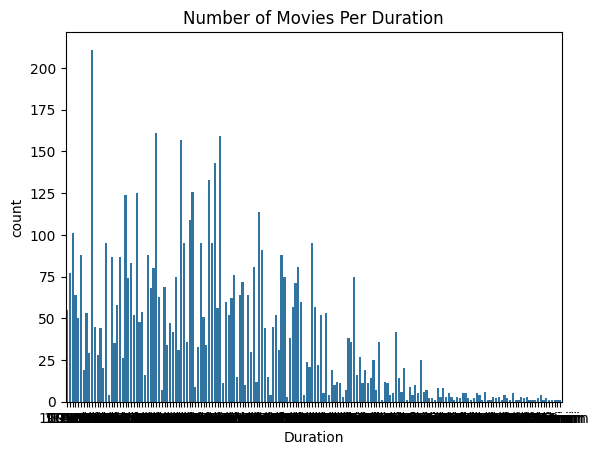

In [35]:
sns.countplot(x='Duration',data=data_frame_02)
plt.title("Number of Movies Per Duration")

In [36]:
top_10=data_frame_02.nlargest(10,'Rating')[['Name','Rating','Genre']].set_index('Name')


In [37]:
top_10

,Rating,Genre
Name,,
Love Qubool Hai,10.0,"Drama, Romance"
Half Songs,9.7,"Music, Romance"
Gho Gho Rani,9.4,"History, Romance"
June,9.4,Drama
The Reluctant Crime,9.4,Drama
Ashok Vatika,9.3,Drama
Baikunth,9.3,Family
God of gods,9.3,Documentary
Love Sorries,9.3,"Comedy, Drama, Romance"


Text(0.5, 1.0, 'Display Top 10 Highest Rated Movie Titles')

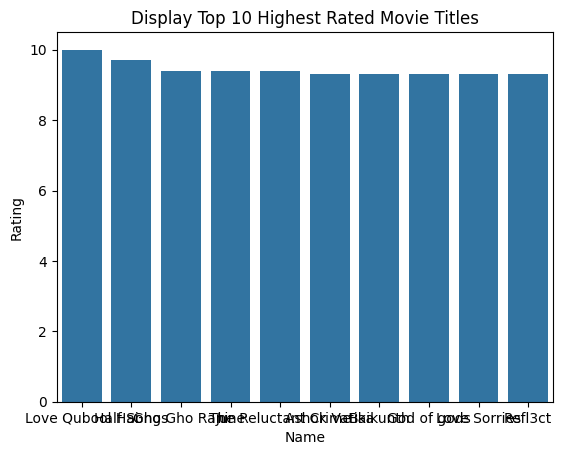

In [38]:
sns.barplot(top_10['Rating'])
plt.title("Display Top 10 Highest Rated Movie Titles")


In [39]:
data_frame_02.columns

Index(['Name', 'Duration', 'Genre', 'Rating'], dtype='object')

In [40]:
def rating(rating):
        if rating>=7.0:
            return 'Excellent'
        elif rating>=6.0:
            return 'Good'
        else:
            return 'Average'


In [41]:
data_frame_02['rating_cat']=data_frame_02['Rating'].apply(rating)


In [42]:

data_frame_02.head()

,Name,Duration,Genre,Rating,rating_cat
1,#Gadhvi (He thought he was Gandhi),109 min,Drama,7.0,Excellent
2,#Homecoming,90 min,"Drama, Musical",6.0,Good
3,#Yaaram,110 min,"Comedy, Romance",4.4,Average
4,...And Once Again,105 min,Drama,6.0,Good
5,...Aur Pyaar Ho Gaya,147 min,"Comedy, Drama, Musical",4.7,Average


In [43]:
data_frame_02.to_csv("Movies_Sorted_Data.csv")

ENDS HERE